In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import sklearn.metrics as sklm

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
df = pd.read_csv(r'DATA\HOUSEPRICES\min_data.csv')
df = df[(df.TotalSF <= 3000) & (df.SalePrice < 500000)]
# normalize
df['TotalSF'] /= 1000
df['SalePrice'] /= 100000

In [28]:
df

,TotalSF,LotArea,BedroomAbvGr,SalePrice
0,1.710,8450,3,2.08500
1,1.262,9600,3,1.81500
2,1.786,11250,3,2.23500
3,1.717,9550,3,1.40000
4,2.198,14260,4,2.50000
5,1.362,14115,1,1.43000
6,1.694,10084,3,3.07000
7,2.090,10382,3,2.00000
8,1.774,6120,2,1.29900
9,1.077,7420,2,1.18000


Text(0,0.5,'Price($)')

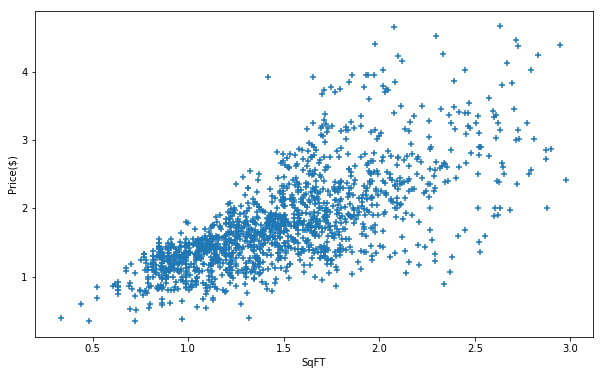

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.TotalSF, df.SalePrice, marker='+')
ax.set_xlabel('SqFT')
ax.set_ylabel('Price($)')

In [29]:
X = np.c_[np.ones(len(df)), df.TotalSF, df.BedroomAbvGr]  #[:5]
X

array([[1.   , 1.71 , 3.   ],
       [1.   , 1.262, 3.   ],
       [1.   , 1.786, 3.   ],
       ...,
       [1.   , 2.34 , 4.   ],
       [1.   , 1.078, 2.   ],
       [1.   , 1.256, 3.   ]])

In [7]:
y = df.SalePrice.values.reshape(-1, 1)#[:5]
y

array([[2.085  ],
       [1.815  ],
       [2.235  ],
       ...,
       [2.665  ],
       [1.42125],
       [1.475  ]])

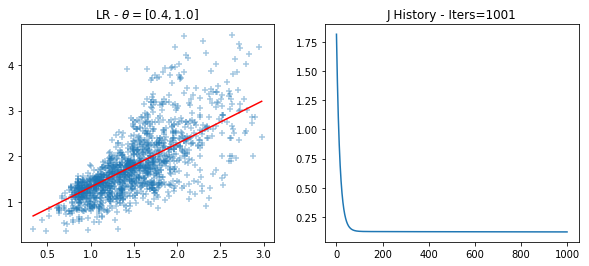

In [8]:
def cost(X, y, θ):
    h = np.dot(X, θ)
    e = h - y
    J = (e**2).mean()/2
    return J, e

def gradient_descent(X, y, θ, n_iters=1000, learning_rate=.01, ϵ=1e-5):
    J_history = []
    JD_history = []
    J, e = cost(X, y, θ)
    J_history.append(J)
    
    for i in range(n_iters):                
        #calc gradients
        dJ = X.T.dot(e)/len(e)  
        
        # update gradients
        θ -= learning_rate * dJ
        J, e = cost(X, y, θ)
        J_history.append(J)
        J_delta = abs(J_history[-2] - J_history[-1])/J_history[-1]
        JD_history.append(J_delta)
        if J_delta <= ϵ:
            #print(f'Reached at {i} {J_history[-5:]} {JD_history[-5:]}')
            break

    return θ, J_history, JD_history


def plot_lr(x, y, θ, ax):
    θ = θ.ravel()
    x_predict = np.linspace(x.min(), x.max(), 100)
    y_predict = θ[0] + θ[1]*x_predict
    ax.scatter(X[:,1], y, marker='+', alpha=0.4)
    ax.plot(x_predict, y_predict, label='Linear Regression', c='r')
    ax.set_title(rf'LR - $\theta = [{θ[0]:.1f},{θ[1]:.1f}]$')

def plot_jh(jh, ax):
    ax.plot(jh)
    ax.set_title(f'J History - Iters={len(jh)}')

θ = np.zeros(2).reshape(-1, 1)
θ, jh, jdh = gradient_descent(X, y, θ, n_iters=1000, learning_rate=.01)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
plot_lr(X[:,1], y, θ, ax1)
plot_jh(jh, ax2)



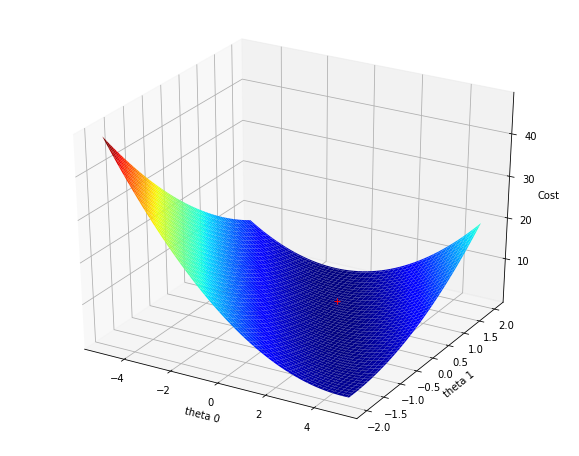

In [9]:
def plot_gradient_plane(X, y, θ):
    t0 = np.linspace(-5, 5, 100)
    t1 = np.linspace(-2, 2, 100)

    xx, yy = np.meshgrid(t0, t1)
    z = np.array([cost(X, y, [[p1],[p2]])[0] for p1, p2  in zip(xx.ravel(), yy.ravel())]).reshape(yy.shape)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, z, cmap=plt.cm.jet)
    ax.plot(θ[0], θ[1], cost(X, y, θ)[0], marker='+', c='r')
    ax.set_xlabel('theta 0')
    ax.set_ylabel('theta 1')
    ax.set_zlabel('Cost')
    
plot_gradient_plane(X, y, θ)

array([[1.99724437],
       [1.57053413],
       [2.06963271],
       ...,
       [2.59730564],
       [1.39527814],
       [1.56481926]])

In [27]:
t1 = np.array([y.mean(), 0]).reshape(-1, 1)
y_predict = np.matmul(X, t1)

y_predict.var(), y.var(), (y-y_predict).var()
1 - (y-y_predict).var()/y.var()
1- (y-y_predict).var()/y.var(), sklm.explained_variance_score(y, y_predict)
sklm.r2_score(y, np.zeros(len(y)) + y.mean())

0.0

In [23]:
sklm.mean_absolute_error(y, y_predict), sklm.mean_squared_error(y, y_predict)

(0.3515172049649994, 0.24674605466054697)

Polynomial Feature Example

In [ ]:
np.random.seed(11)
n = 25
x = (np.linspace(0, 10, n) + np.random.randn(n)/5).reshape(-1, 1)


In [ ]:
x

In [ ]:
y = np.sin(x) + x/6 + (np.random.randn(n)/10).reshape(-1,1)
y

In [ ]:
plt.figure()
plt.scatter(x, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
plt.figure()
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)


print(f'Train accuracy: {train_score:.1f} Test Accuracy: {test_score:.1f}')

In [ ]:
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, lr.predict(X_test))
print(f'Test R2 Score: {test_r2:.1f}')

In [ ]:
X_predict = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_predict = lr.predict(X_predict)
plt.figure()
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(X_predict, y_predict, alpha=.8, c='y', label='Regression Fit')

### Internal of Gradient Descent 


##### Profits vs Population

In [11]:
f = r'data/poulation-profit.txt'
data = pd.read_csv(f, header=None, names=['Population', 'Profit'])

In [13]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


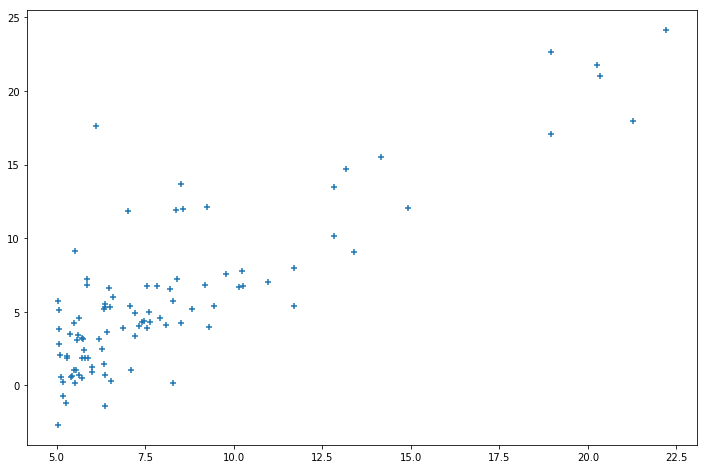

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data.Population, data.Profit, marker='+')

#### LInear Regression

Linear Model of one varaible
$\theta$ = (w, b)

Where w = Slope, b = Intercept (Bias)

$\hat y = (w* x)+b$

$\epsilon = (\hat y - y) = (x*w + b - y)$


#### Vector Terms


In [84]:
def cost(X, y, θ):
    h = np.square(X.dot(θ) - y)
    J = h.mean()/2
    return J

In [124]:

X = np.c_[np.ones(len(data)), data.Population.values]
θ = np.array([[0], [0]])
y = data.Profit.values.reshape(-1, 1)
cost(X, y, θ)

32.072733877455676

In [10]:

    
plot_gradient_plane(X, y, t)

<IPython.core.display.Javascript object>


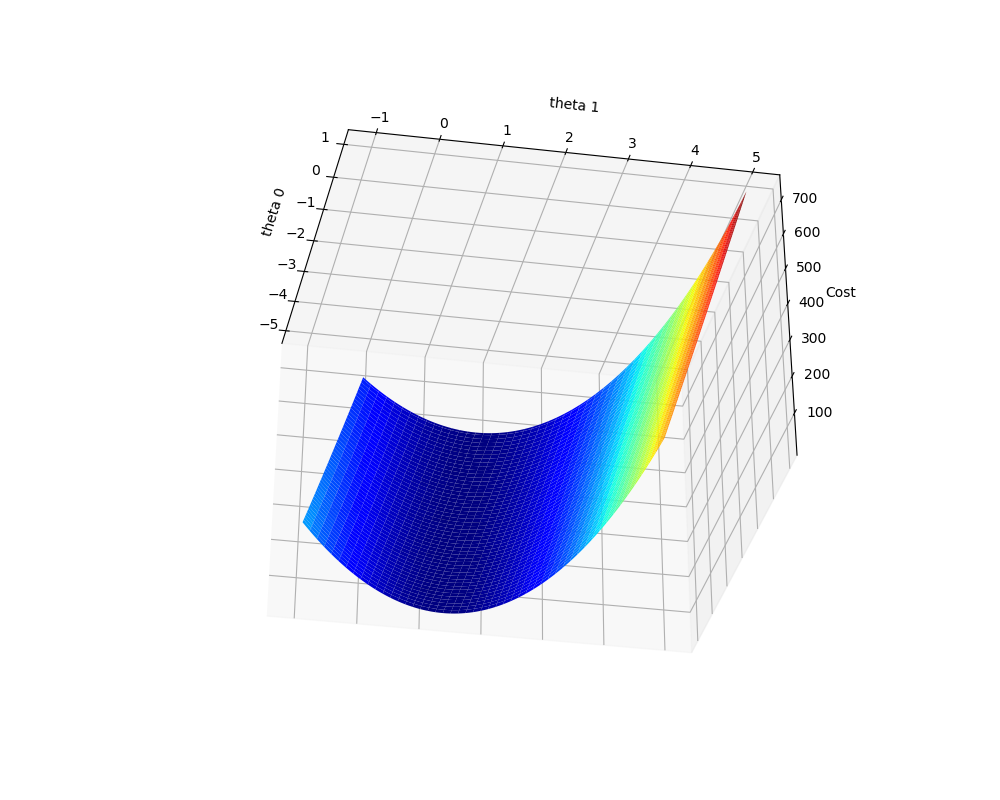

Text(0.5,0,'Cost')

In [194]:
def gradient_descent(X, y, θ, n_iters=3500, learning_rate=.01):
    J_history = []
    m = y.size
    for i in range(n_iters):
        h = X.dot(θ)
        v = X.T.dot(h - y)
        θ = θ - learning_rate * (1/m) * (X.T.dot(h-y))
        J_history.append(cost(X, y, θ))
    return θ, J_history

θ1, J_history = gradient_descent(X, y, θ)

In [195]:
print(θ1)

[[-3.88858772]
 [ 1.19231101]]


<IPython.core.display.Javascript object>


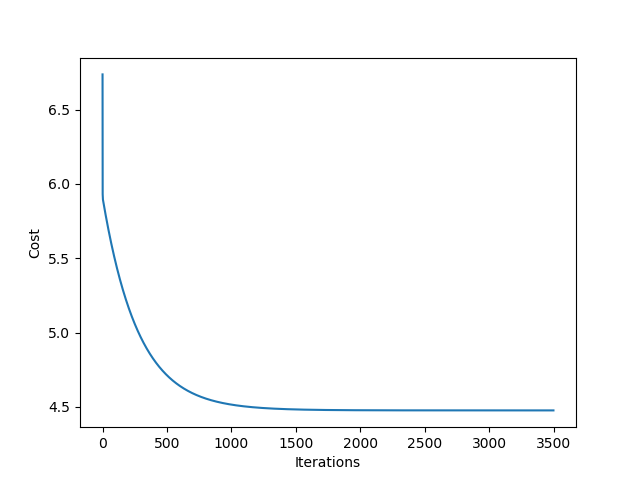

Text(0,0.5,'Cost')

In [196]:
plt.figure()
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')

<IPython.core.display.Javascript object>


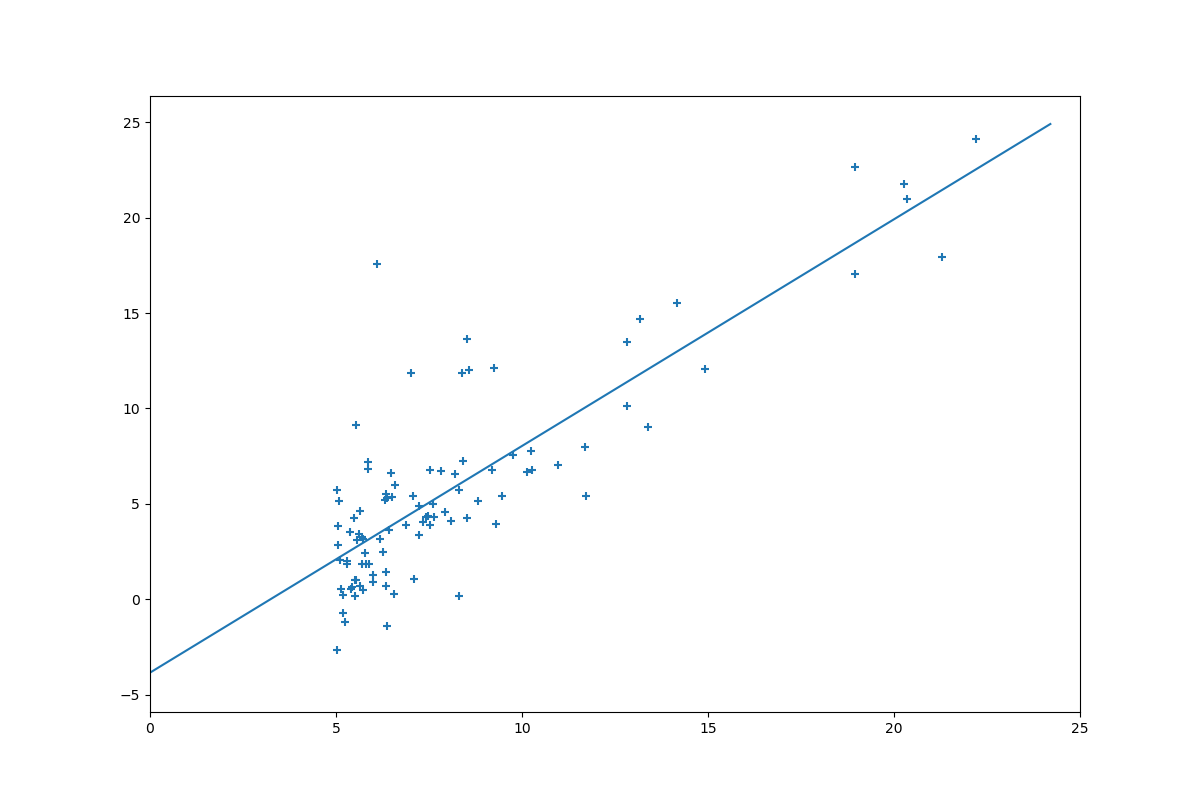

(0, 25)

In [212]:
θ1, J_history = gradient_descent(X, y, θ, n_iters=2500)
